# Lab 2

## Task 01, Part 02

In [ ]:
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data      

tf.set_random_seed(0)                                           

# load data, 60K trainset and 10K testset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  

# 1. Define Variables and Placeholders


X = tf.placeholder(tf.float16, [None, 28, 28, 1])
Y_ = tf.placeholder(tf.float16, [None, 10])
W = tf.Variable(tf.zeros([784, 10], dtype=tf.float16))
b = tf.Variable(tf.zeros([10], dtype=tf.float16))
XX = tf.reshape(X, [-1, 784])

# 2. Define the model

Y = tf.nn.softmax(tf.matmul(XX, W) + b)

# 3. Define the loss function
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, Y_))
cross_entropy = -tf.reduce_sum(Y_*tf.log(tf.clip_by_value(Y,1e-10,1.0)))

# 4. Define the accuracy 
accuracy = tf.Variable(tf.zeros([1], tf.float16))
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float16))

# 5. Define an optimizer
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)

# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
9900

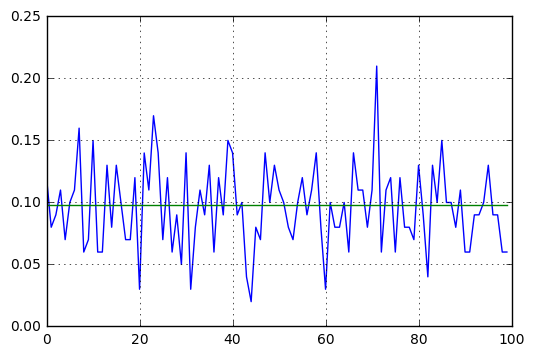

In [2]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()


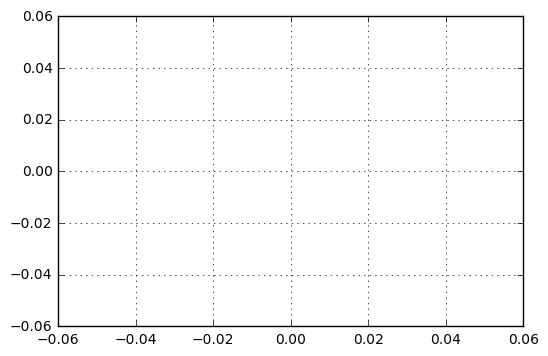

In [3]:
# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()


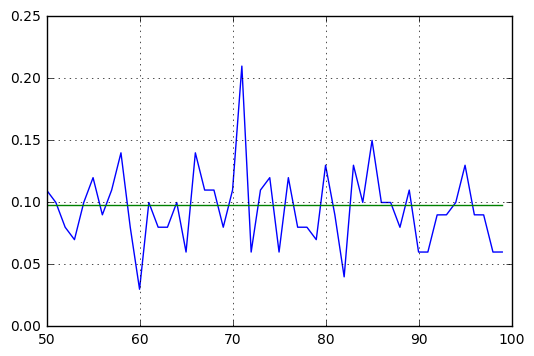

In [4]:
# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

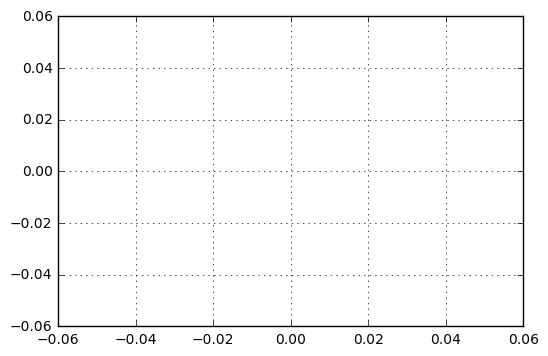

In [5]:
plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()

In [6]:
a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
print "Accuracy: %f, Loss: %f" %(a, c)

Accuracy: 0.098022, Loss: nan


In [7]:
sess.close()

If I use `float32` data types, best I get is 92-93%, with a loss of about 1.5. Using `float16`, I get 98% accuracy, and loss vanishes.